# # #  <p style="text-align: center;">Project 1 for Unsupervised Learning course



In [225]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics
cars_df=pd.read_csv('cars-dataset.csv')
print cars_df.head(10)
cars_df.info()
cars_df.describe()


                    car name  cyl   disp   hp    wt   acc  yr   mpg
0  chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0
1          buick skylark 320    8  350.0  165  3693  11.5  70  15.0
2         plymouth satellite    8  318.0  150  3436  11.0  70  18.0
3              amc rebel sst    8  304.0  150  3433  12.0  70  16.0
4                ford torino    8  302.0  140  3449  10.5  70  17.0
5           ford galaxie 500    8  429.0  198  4341  10.0  70  15.0
6           chevrolet impala    8  454.0  220  4354   9.0  70  14.0
7          plymouth fury iii    8  440.0  215  4312   8.5  70  14.0
8           pontiac catalina    8  455.0  225  4425  10.0  70  14.0
9         amc ambassador dpl    8  390.0  190  3850   8.5  70  15.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


# # #  <p style="text-align: left;">clean the data

In [226]:



cars_df.drop( cars_df[ cars_df['cyl'].astype(str) == '?' ].index , inplace=True)
cars_df.drop( cars_df[ cars_df['disp'].astype(str) == '?' ].index , inplace=True)
cars_df.drop( cars_df[ cars_df['hp'].astype(str) == '?' ].index , inplace=True)

cars_df.drop( cars_df[ cars_df['wt'].astype(str) == '?' ].index , inplace=True)
cars_df.drop( cars_df[ cars_df['acc'].astype(str) == '?' ].index , inplace=True)
cars_df.drop( cars_df[ cars_df['yr'].astype(str) == '?' ].index , inplace=True)
cars_df.drop( cars_df[ cars_df['mpg'].astype(str) == '?' ].index , inplace=True)




In [227]:
#Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves 
#in the plot should give a visual identification of different clusters existing in the dataset)


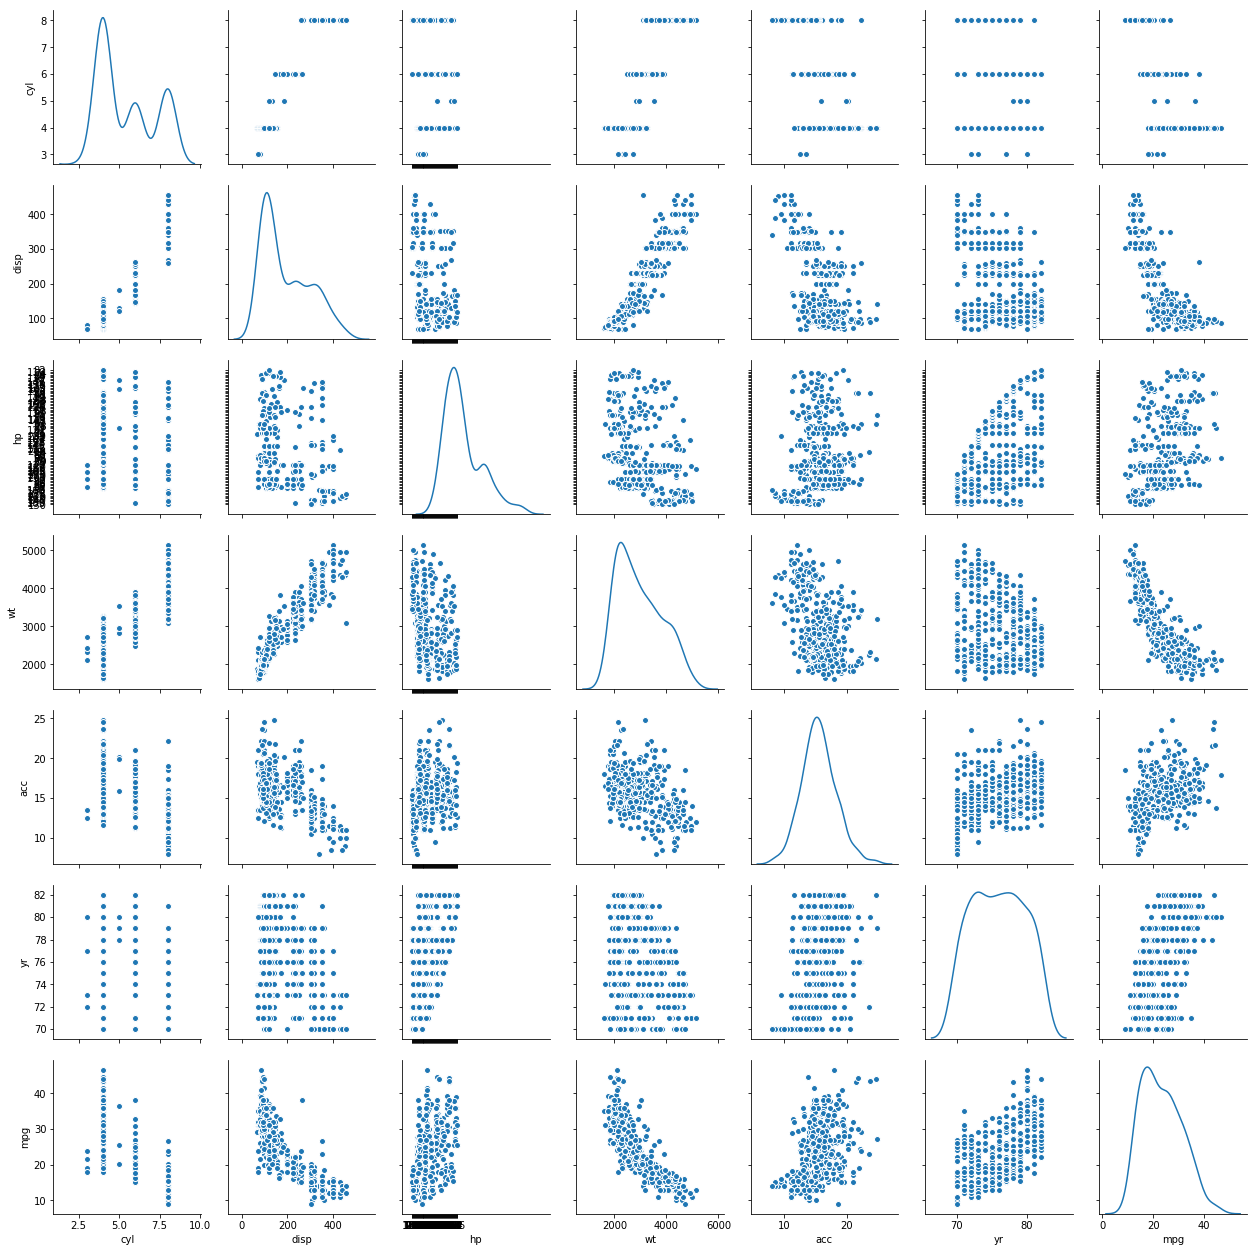

In [228]:
#sns.pairplot(cars_df,diag_kind='kde',hue='cyl')
sns.pairplot(cars_df,diag_kind='kde')

# Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters 

Text(0.5,1,'Selecting k with the Elbow Method')

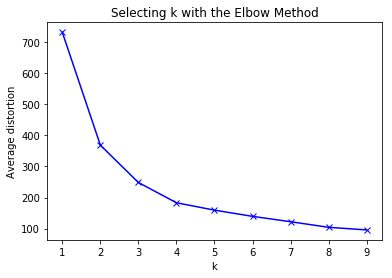

In [229]:
cars_df_attributes =cars_df.drop("car name",axis=1)




#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k,random_state=3)
    model.fit(cars_df_attributes)
    prediction=model.predict(cars_df_attributes)
    meanDistortions.append(sum(np.min(cdist(cars_df_attributes, model.cluster_centers_, 'euclidean'), axis=1)) / cars_df_attributes.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Group name Assigned : 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000020A682518>,
      dtype=object)

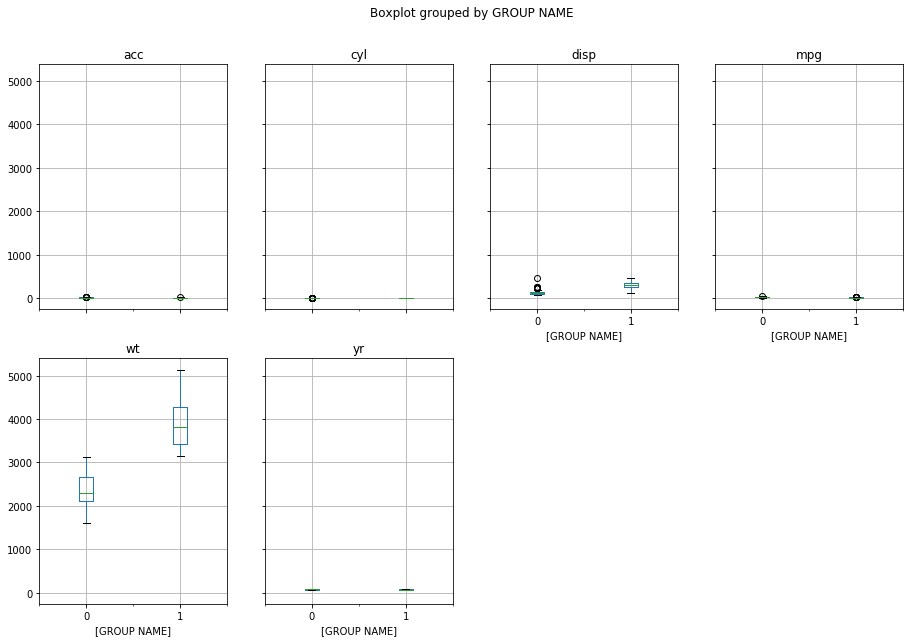

In [230]:
#No signigiant bends are seen after points 2 or 3  

# Let us first start with K = 2, 
final_model=KMeans(2,random_state=3)
final_model.fit(cars_df_attributes)
prediction=final_model.predict(cars_df_attributes)

#Append the prediction 
cars_df["GROUP NAME"] = prediction
print("Group name Assigned : \n")
cars_df[["car name", "GROUP NAME"]]
cars_df.boxplot(by = 'GROUP NAME',  layout=(2,4), figsize=(15, 10))

Group name Assigned : 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000002133EB518>,
      dtype=object)

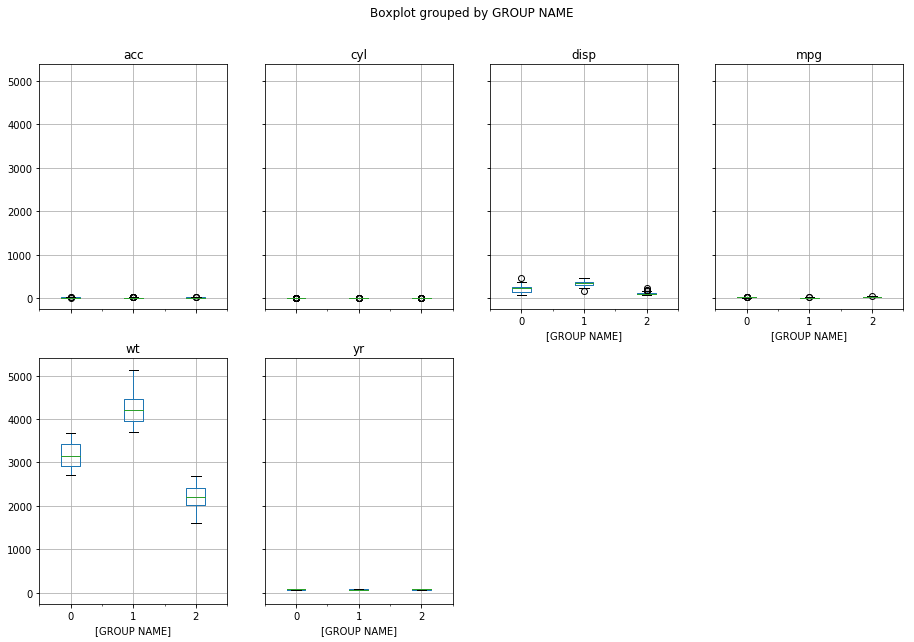

In [231]:
#  with K = 3, 
final_model=KMeans(3,random_state=3)
final_model.fit(cars_df_attributes)
prediction=final_model.predict(cars_df_attributes)

#Append the prediction 
cars_df["GROUP NAME"] = prediction
print("Group name Assigned : \n")
cars_df[["car name", "GROUP NAME"]]
cars_df.boxplot(by = 'GROUP NAME',  layout=(2,4), figsize=(15, 10))

In [232]:
#   with K = 4, 
#final_model=KMeans(4,random_state=3)
#final_model.fit(cars_df_attributes)
#prediction=final_model.predict(cars_df_attributes)

#Append the prediction 
#cars_df["GROUP NAME"] = prediction
#print("Group name Assigned : \n")
#cars_df[["car name", "GROUP NAME"]]
#cars_df.boxplot(by = 'GROUP NAME',  layout=(2,4), figsize=(15, 10))

In [ ]:
#segregating data based on cluster ID

sns.pairplot( data=cars_df, hue="GROUP NAME", diag_kind='kde' )

#COULD SEE A significant affinity of weight and mpg in the pairplot post clusering, hence a seperate graph made below

In [ ]:

sns.lmplot('wt', 'mpg', 
           data=cars_df, 
           fit_reg=False, 
           hue="GROUP NAME",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('weigth  vs MPG')
plt.xlabel('wt')
plt.ylabel('mpg')


# Use linear regression model on different clusters separately and print the coefficients of the models individually

In [ ]:
for x in range(3):
    cluster_df=cars_df[cars_df['GROUP NAME']==x]
    y=cluster_df['mpg']
    X=cluster_df[['cyl','disp','hp','wt','acc','yr']]
    lm=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(X,y)
    lm.fit(X_train,y_train)
    #print (lm.intercept_)
    #print (lm.coef_)
    y_predicted = lm.predict(X_test)
    
    print('Cluster: %i' %x)
    print('Liner Regression R squared: %.4f' % lm.score(X_test, y_test))
    lin_mse = mean_squared_error(y_predicted, y_test)
    lin_rmse = np.sqrt(lin_mse)
    print('Liner Regression RMSE: %.4f' % lin_rmse)
    lin_mae = mean_absolute_error(y_predicted, y_test)
    print('Liner Regression MAE: %.4f' % lin_mae)

    
    
    
